In [43]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import pandas as pd 
from pathlib import Path 
import numpy as np
import matplotlib
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


In [38]:
data_dir = Path(Path.home(), "Documents/xray/score_bench/data")
job_dir = Path(data_dir, "00_ff")

all_rmsds_dict = dict()
all_scores_dict = dict() 

include_native = False
scores_dfs = list() 
native_dfs = list() 
# score_files = list(job_dir.glob("scores*"))
score_files = list() 
score_files.append(Path(data_dir, "3ca7/40_1/best_1000_3ca7_0.csv"))
score_files.append(Path(data_dir, "3ca7/41_2/best_1000_3ca7_0.csv"))
score_files.append(Path(data_dir, "3ca7/42_4/best_1000_3ca7_0.csv"))
score_files.append(Path(data_dir, "3ca7/43_8/best_1000_3ca7_0.csv"))
score_files.append(Path(data_dir, "3ca7/44_16/best_1000_3ca7_0.csv"))

for score_file in score_files:
    scores_df = pd.read_csv(score_file)

    scores_dfs.append(scores_df.loc[scores_df["native"] == 0])

n_row = 5


In [44]:
font_size = 20 
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

axes = {'labelsize': font_size}

xtick = {'labelsize': font_size}
ytick = {'labelsize': font_size}
legend = {'fontsize': font_size,
          'markerscale': 2,
          'title_fontsize': font_size,
          'loc': "upper left"}

matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('xtick', **xtick)
matplotlib.rc('ytick', **ytick)
matplotlib.rc('legend', **legend)

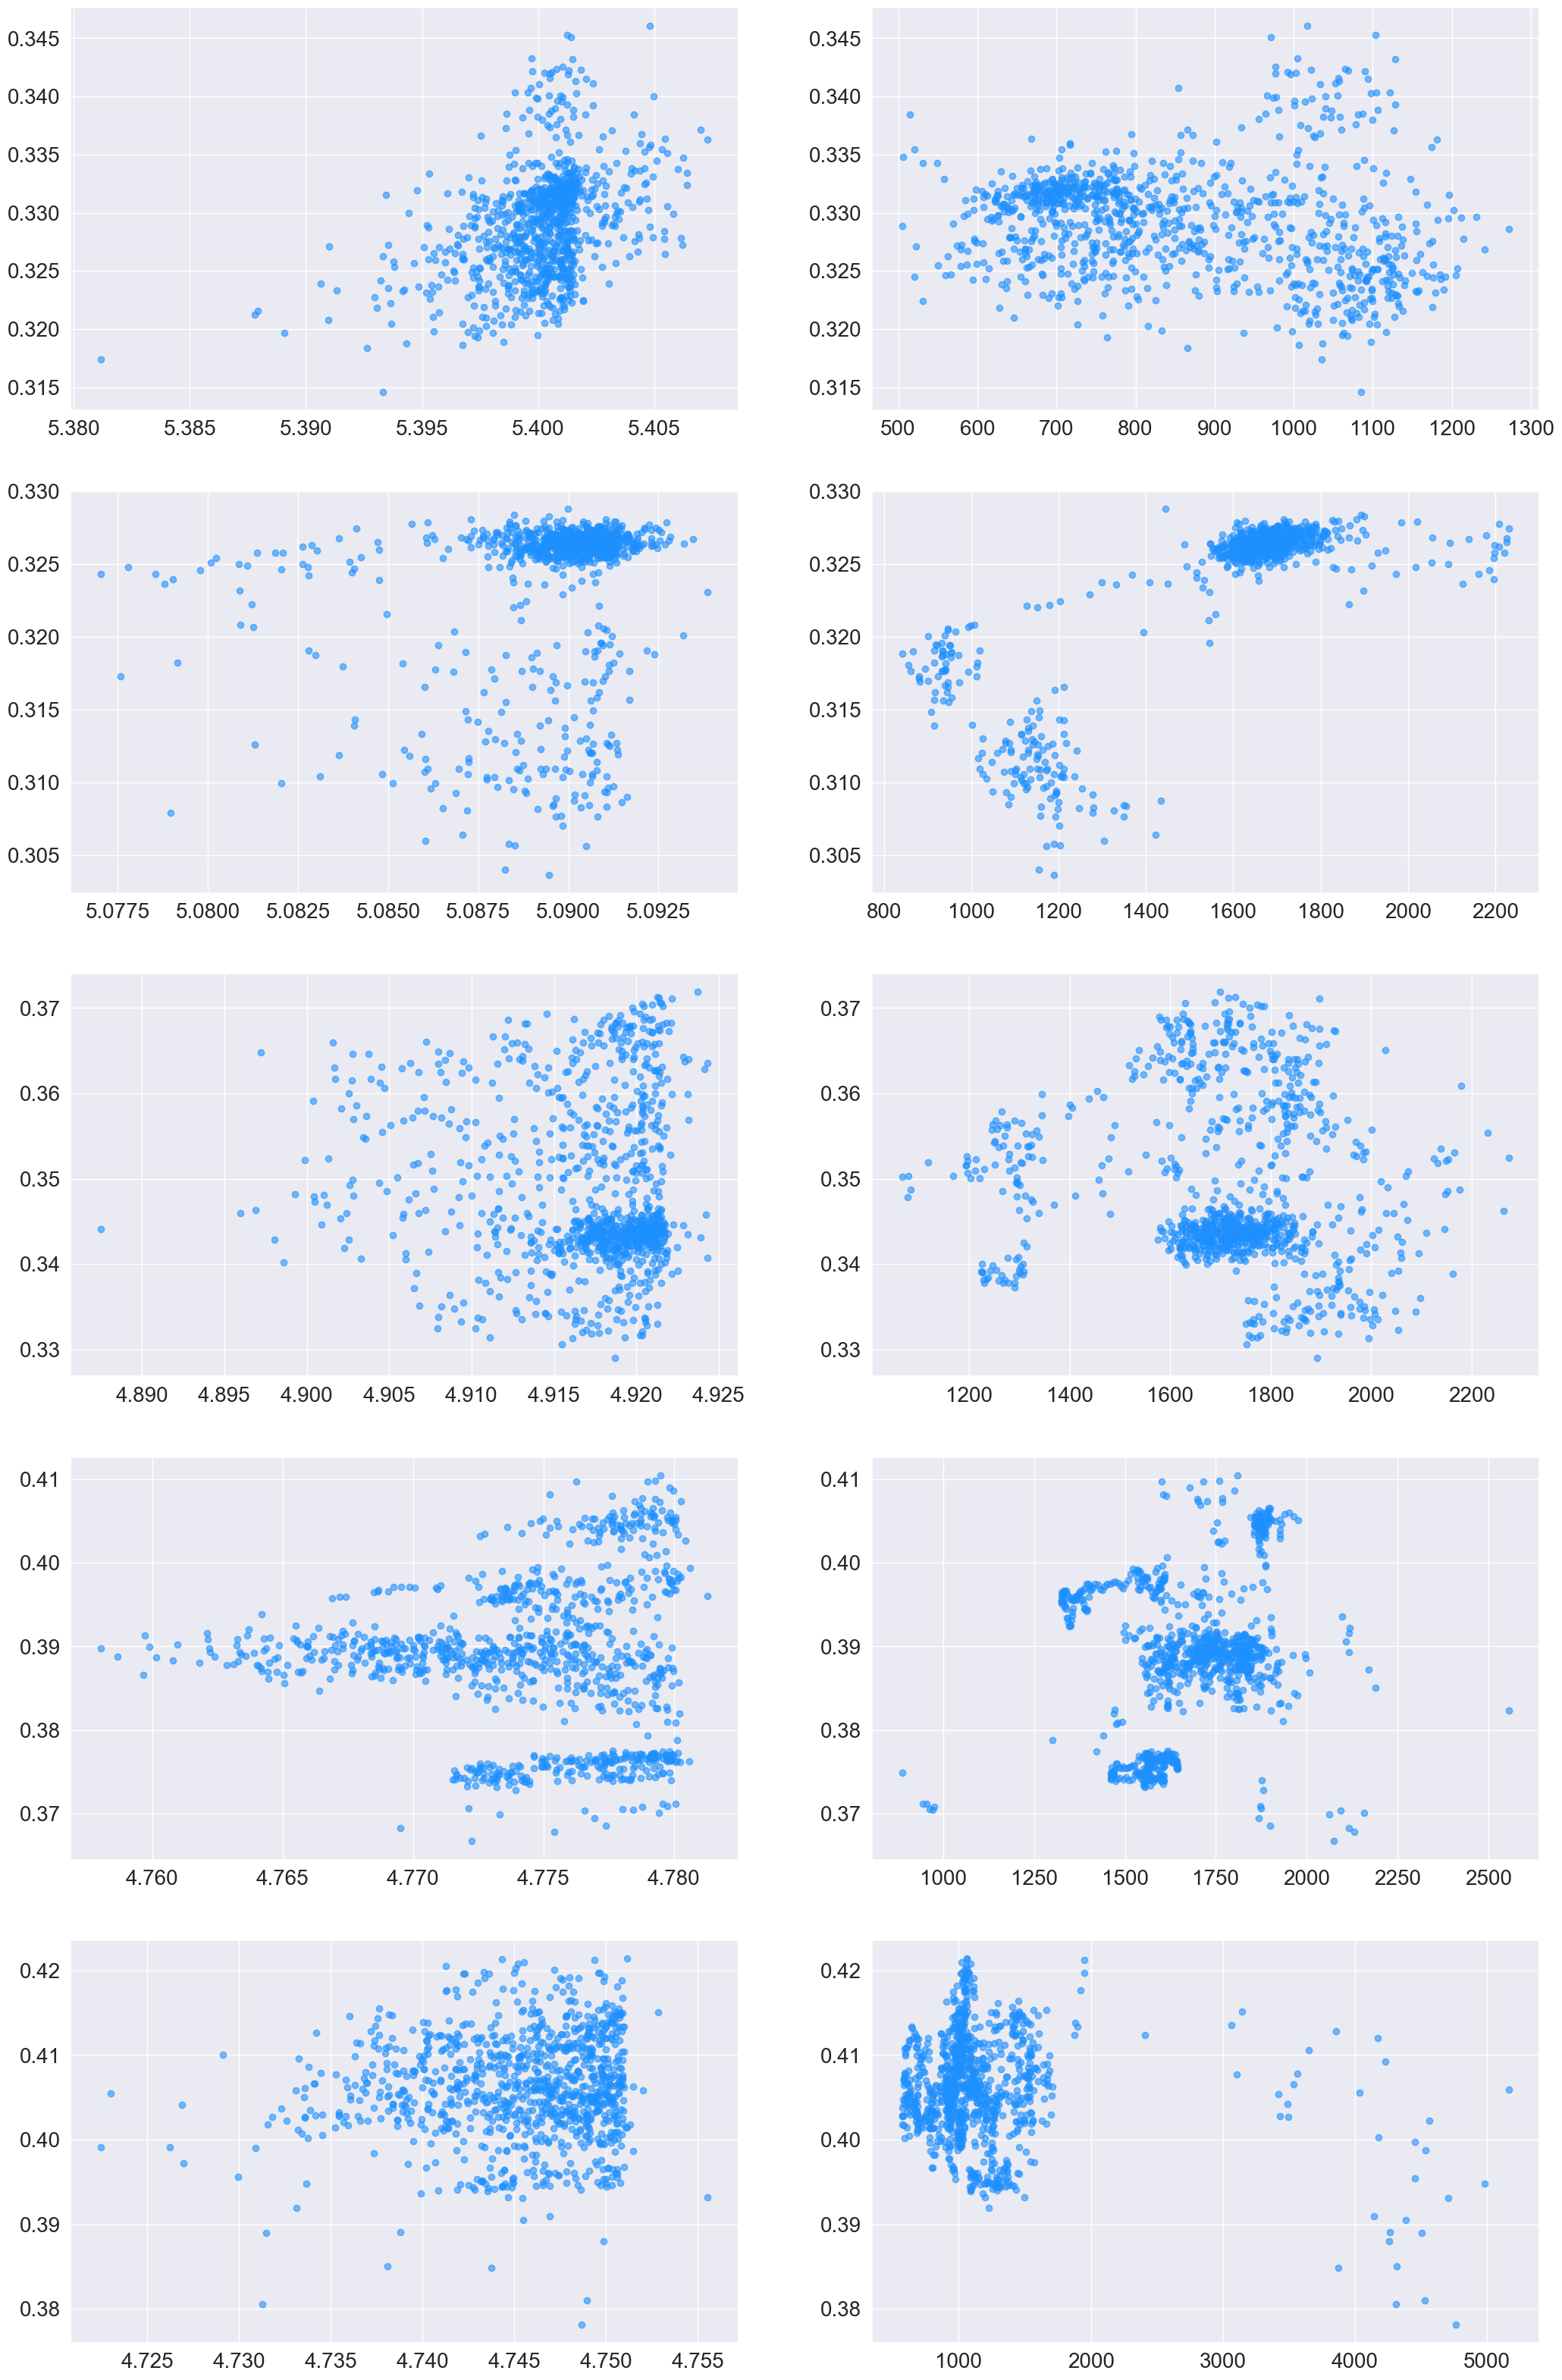

In [52]:
fig_file = Path(Path.home(), "Desktop/r_free_corr.png")

fig, axs = plt.subplots(n_row, 2, figsize=(25,8*n_row))

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], linestyle='None'))
# axs[0][0].legend(custom_legend, ['ml'])
# axs[0][1].legend(custom_legend, ['ff'])
# axs[0][0].set_ylabel("r_free")
# axs[0][0].set_xlabel("ml")
# axs[0][1].set_ylabel("r_free")
# axs[0][1].set_xlabel("ff")

for i in range(len(scores_dfs)):
    score_df = scores_dfs[i]
     
    ax1_1 = axs[i][0]
    ax1_1.scatter(score_df["ml"], score_df["r_free"], c=colors[0], alpha=alpha_on)

    ax2_1 = axs[i][1]
    ax2_1.scatter(score_df["ff"], score_df["r_free"], c=colors[0], alpha=alpha_on)


# plt.show()
plt.savefig(fig_file)

